In [13]:
import pandas as pd


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [14]:
df = pd.read_csv('loan_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [15]:
nan_counts = df.isna().sum()
nan_percentage = (nan_counts / len(df)) * 100
nan_summary = pd.DataFrame({'Missing Values': nan_counts, 'Percentage': nan_percentage})
print(nan_summary[nan_summary['Missing Values'] > 0])
threshold = 20  

nan_summary = pd.DataFrame({'Missing Values': df.isna().sum(), 'Percentage': (df.isna().sum() / len(df)) * 100})
columns_to_drop = nan_summary[nan_summary['Percentage'] > threshold].index

df = df.drop(columns=columns_to_drop)

                           Missing Values  Percentage
AMT_ANNUITY_x                          93    0.006578
AMT_GOODS_PRICE_x                    1208    0.085449
NAME_TYPE_SUITE_x                    3526    0.249416
OWN_CAR_AGE                        937206   66.294499
OCCUPATION_TYPE                    457580   32.367523
...                                   ...         ...
DAYS_FIRST_DUE                     561106   39.690571
DAYS_LAST_DUE_1ST_VERSION          561106   39.690571
DAYS_LAST_DUE                      561106   39.690571
DAYS_TERMINATION                   561106   39.690571
NFLAG_INSURED_ON_APPROVAL          561106   39.690571

[81 rows x 2 columns]


In [16]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164707 entries, 0 to 1413700
Data columns (total 94 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1164707 non-null  int64  
 1   TARGET                        1164707 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1164707 non-null  object 
 3   CODE_GENDER                   1164707 non-null  object 
 4   FLAG_OWN_CAR                  1164707 non-null  object 
 5   FLAG_OWN_REALTY               1164707 non-null  object 
 6   CNT_CHILDREN                  1164707 non-null  int64  
 7   AMT_INCOME_TOTAL              1164707 non-null  float64
 8   AMT_CREDIT_x                  1164707 non-null  float64
 9   AMT_ANNUITY_x                 1164707 non-null  float64
 10  AMT_GOODS_PRICE_x             1164707 non-null  float64
 11  NAME_TYPE_SUITE_x             1164707 non-null  object 
 12  NAME_INCOME_TYPE            

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


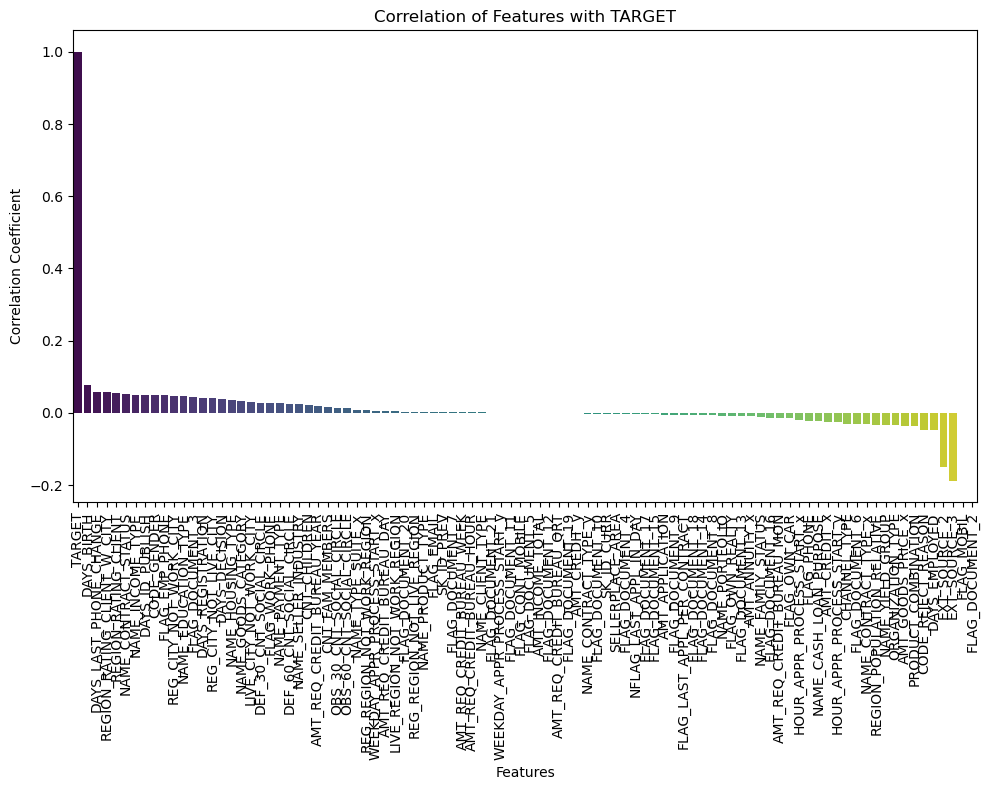

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df.corr()['TARGET'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with TARGET')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
sorted_correlations = correlations.abs().sort_values(ascending=False)
for col, value in sorted_correlations.items():
    print(f"{col}: {value}")


TARGET: 1.0
EXT_SOURCE_3: 0.18828286609590453
EXT_SOURCE_2: 0.15072481017479955
DAYS_BIRTH: 0.07795446425361266
DAYS_LAST_PHONE_CHANGE: 0.057516420574446614
REGION_RATING_CLIENT_W_CITY: 0.05695908851030838
REGION_RATING_CLIENT: 0.05428541301445442
NAME_CONTRACT_STATUS: 0.05195574769628462
NAME_INCOME_TYPE: 0.05078975579621757
DAYS_ID_PUBLISH: 0.05073755214757222
CODE_GENDER: 0.05059075400225769
FLAG_EMP_PHONE: 0.049470965359664755
DAYS_EMPLOYED: 0.04847928171039749
REG_CITY_NOT_WORK_CITY: 0.04776945151014341
NAME_EDUCATION_TYPE: 0.047165391441396795
CODE_REJECT_REASON: 0.0462902459566565
FLAG_DOCUMENT_3: 0.04464711715217822
DAYS_REGISTRATION: 0.0425430543017141
REG_CITY_NOT_LIVE_CITY: 0.04021184126021199
DAYS_DECISION: 0.03986169954462112
PRODUCT_COMBINATION: 0.03665651500714826
NAME_HOUSING_TYPE: 0.035712780146180824
AMT_GOODS_PRICE_x: 0.03497067160164297
ORGANIZATION_TYPE: 0.03447190207039641
NAME_YIELD_GROUP: 0.03369962833695574
REGION_POPULATION_RELATIVE: 0.03219954299091296
NAME_G

In [ ]:
from sklearn.model_selection import train_test_split

shortlisted_col = sorted_correlations.head(10).index
x = df[shortlisted_col].drop('TARGET', axis=1, errors='ignore')
y = df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "SVM": SVC(),
#     "AdaBoost": AdaBoostClassifier(),
#     "Extra Trees": ExtraTreesClassifier(),
#     "Bagging Classifier": BaggingClassifier(),
#     "Voting Classifier": VotingClassifier(estimators=[
#         ('lr', LogisticRegression()),
#         ('dt', DecisionTreeClassifier())
#     ], voting='hard'),
#     "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
#     "HistGradientBoosting": HistGradientBoostingClassifier(),
#     "XGBoost": XGBClassifier(),
#     "LightGBM": LGBMClassifier()
# }



In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"{type(model).__name__}: {accuracy:.4f}")

DecisionTreeClassifier: 0.9921


In [ ]:
# import pickle
# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

# with open('col_names.pkl', 'wb') as col_file:
#     pickle.dump(x_train.columns.tolist(), col_file)

# label_encodings = {col: le.classes_ for col, le in label_encoders.items()}
# with open('lab_enc.pkl', 'wb') as enc_file:
#     pickle.dump(label_encodings, enc_file)

In [ ]:
x_train

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,DAYS_ID_PUBLISH
479980,0.085595,0.347928,-10043,-1453.0,3,3,1,0,-2421
399306,0.331251,0.521686,-16478,-1072.0,2,2,0,5,-9
1297971,0.576209,0.620805,-15992,-1125.0,2,2,0,0,-4956
614511,0.342529,0.698075,-16589,-1567.0,2,2,0,5,-136
450053,0.411849,0.676246,-20428,-751.0,1,1,2,0,-3954
...,...,...,...,...,...,...,...,...,...
133706,0.863363,0.671204,-18489,-1512.0,2,2,0,5,-2008
314361,0.798137,0.683002,-23735,-1803.0,2,2,1,1,-4923
160427,0.288130,0.517860,-9531,-854.0,2,2,0,5,-2153
814621,0.304672,0.337779,-9064,-926.0,2,2,1,5,-1738


['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'DAYS_ID_PUBLISH']

In [28]:
df = pd.read_csv('loan_data.csv')


In [ ]:
df[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'DAYS_ID_PUBLISH']].head(1)

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,DAYS_ID_PUBLISH
